This is a code to analyze nobel prize winner data, e.g. top countries to win the most nobel prizes, youngest and oldest person, person with two nobel prizes etc.

In [52]:
#Importing necessary modules


In [5]:
from IPython.display import display
import pandas as pd
import seaborn as sns
import numpy as np

In [53]:
#Reading in the Nobel Prize data

In [6]:
nobel = pd.read_csv("nobel_archive.csv")

In [54]:
#Taking a look at the first six winners and lenngth of the data file

In [7]:
print(nobel.head(n=6))
display(len(nobel))

   Year    Category                                           Prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   
5  1901     Physics                 The Nobel Prize in Physics 1901   

                                          Motivation Prize Share  Laureate ID  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   
5  "in recogniti

969

In [ ]:
#Number of prizes won by male and female recipients.

In [8]:
display(nobel["Sex"].value_counts())

Male      893
Female     50
Name: Sex, dtype: int64

In [ ]:
# Number of prizes won by the top 10 nationalities.


In [11]:
nobel["Birth Country"].value_counts().head(10)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

In [ ]:
#Calculating the proportion of USA born winners per decade

In [14]:
nobel['usa_born_winner'] = nobel["Birth Country"]=="United States of America"
nobel['decade'] = (np.floor(nobel["Year"]/10)*10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)['usa_born_winner'].mean()

In [ ]:
# Display the proportions of USA born winners per decade
#Setting the plotting theme

In [15]:
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners

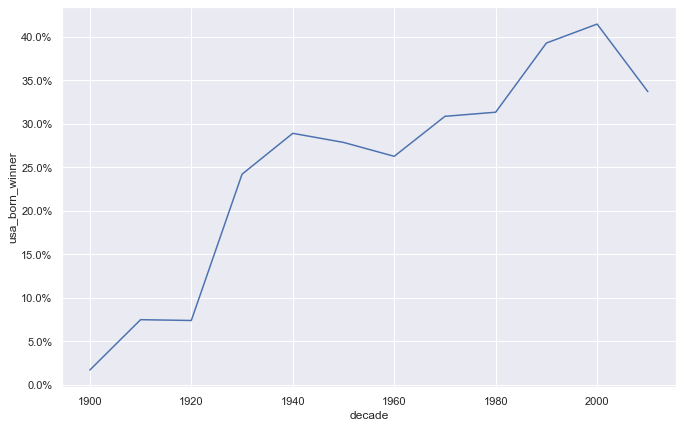

In [16]:
ax = sns.lineplot(x="decade", y="usa_born_winner", data=prop_usa_winners)
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1))

# Calculating the proportion of female laureates per decade

In [19]:
nobel['female_winner'] = nobel["Sex"]=="female"
prop_female_winners = nobel.groupby(["decade","Category"], as_index=False)['female_winner'].mean()

In [20]:
# Plotting USA born winners with % winners on the y-axis

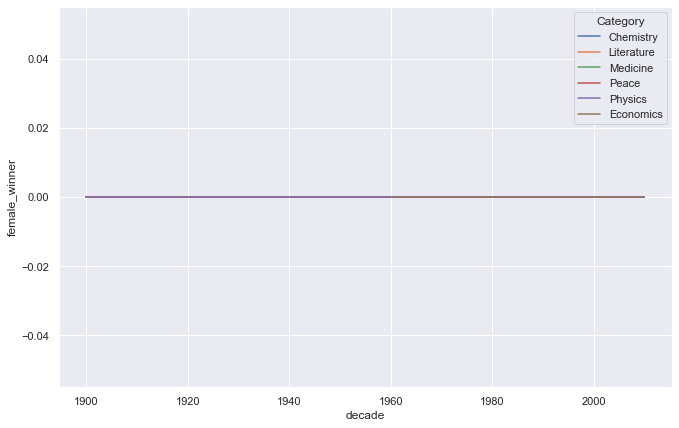

In [21]:
ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)

# Picking out the first woman to win a Nobel Prize

In [23]:
nobel[nobel["Sex"]=="Female"].nsmallest(1,"Year")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,False


In [24]:
# Selecting the laureates that have received 2 or more prizes.

In [26]:
nobel.groupby(["Full Name"]).filter(lambda nmae: len(nmae)>=2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,False
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,False
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,...,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",...,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


In [27]:
# Converting birth_date from String to datetime

In [37]:
nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'], errors='coerce')

# Calculating the age of Nobel Prize winners

In [39]:
nobel['age'] = nobel['Year']-nobel['Birth Date'].dt.year

In [40]:
# Plotting the age of Nobel Prize winners


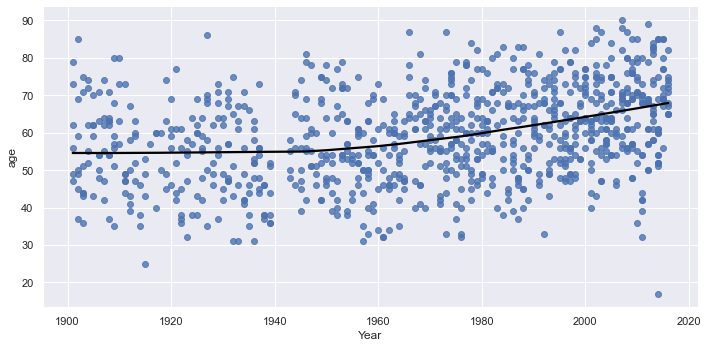

In [42]:
sns.lmplot(x='Year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color' : 'black'})

In [43]:
# Same plot as above, but separate plots for each type of Nobel Prize

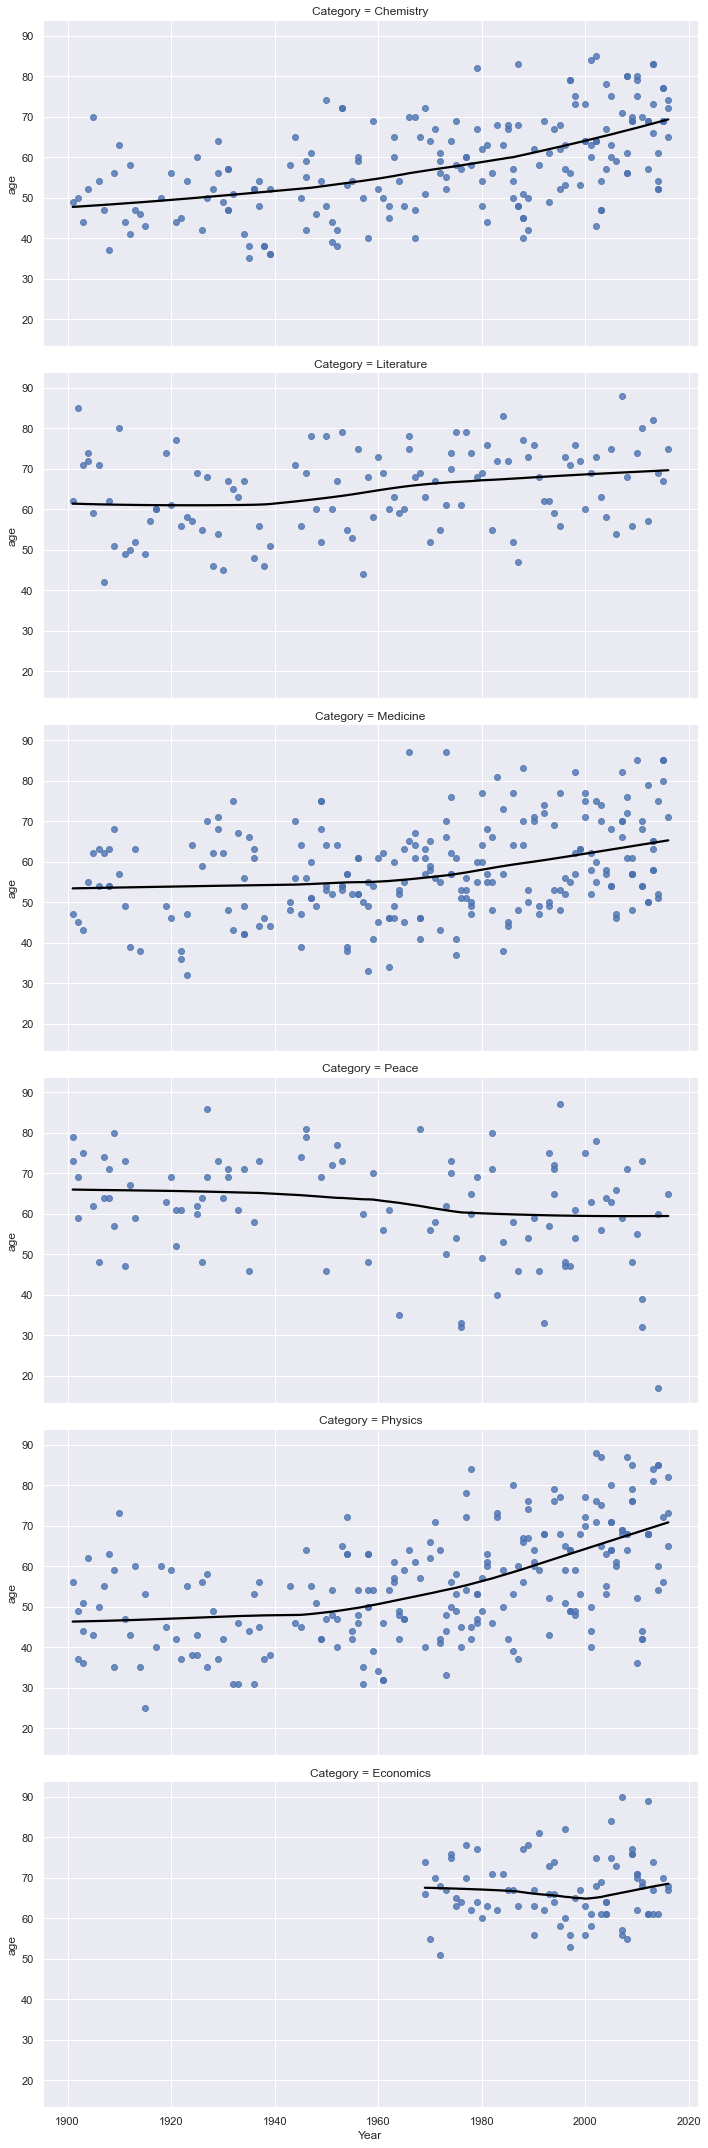

In [44]:
sns.lmplot(x='Year', y='age', data=nobel, row='Category', lowess=True, aspect=2, line_kws={'color' : 'black'})

In [45]:
# The oldest winner of a Nobel Prize as of 2016

In [46]:
display(nobel.nlargest(1, 'age'))

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


In [47]:
# The youngest winner of a Nobel Prize as of 2016

In [48]:
nobel.nsmallest(1, 'age')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,False,17.0
